In [57]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

In [58]:
df = pd.read_csv(r'C:\Users\ksury\Desktop\MLdatasets\CLASS\cardheko.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


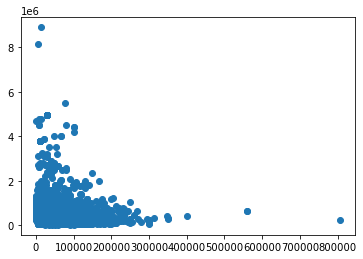

In [59]:
plt.scatter(df[['km_driven']],df[['selling_price']])

In [60]:
year_mean = df['year'].mean()
year_std = df['year'].std()



km_mean = df['km_driven'].mean()
km_std = df['km_driven'].std()

df['year'] = (df['year'] - year_mean) / year_std
df['selling_price'] = (df['selling_price']  - df['selling_price'].mean()) / df['selling_price'].std() 
df['km_driven'] = (df['km_driven'] - km_mean) / km_std
df.head()
#Standardization

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,-1.444908,-0.767658,0.081130,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,-1.444908,-0.638023,-0.347649,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,-0.258765,0.165712,0.724298,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,0.927378,-0.439250,-0.433405,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,0.215692,-0.093557,1.603294,Diesel,Individual,Manual,Second Owner


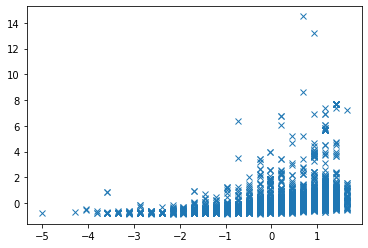

In [61]:
plt.plot(df[['year']],df[['selling_price']],'x')

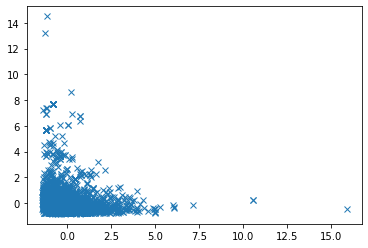

In [62]:
plt.plot(df[['km_driven']],df[['selling_price']],'x')

In [85]:
class LinearRegression():
    
    def __init__(self,X,y,itr = 100000,alpha = 0.01):
        self.m = X.shape[0]
        self.X = self.hstack_one(X)
        
        self.y = y
        self.itr = itr
        self.alpha = alpha
        self.theta = np.zeros((self.X.shape[1],1))
        
        
        
    def hstack_one(self,input_matrix):
        if len(input_matrix.shape) == 1:
            return np.hstack((np.array([1]), input_matrix))
        else:
            return np.hstack((np.ones((input_matrix.shape[0], 1)), input_matrix))
    
    
    
    def cost(self,theta):
        
        hyp = self.X.dot(theta)
        
        cost = (1/2*self.m) * np.sum((hyp - self.y) ** 2)
        
        return cost
    
    def gradient_decent(self):
        
        
        t_x = self.X.conj().T
        theta = self.theta
        self.j_hist = []
        self.i_hist = []
        for i in range(self.itr):
            hyp = np.dot(self.X, theta)
            
            
            theta = theta - (self.alpha/self.m) * (t_x @ (hyp - self.y))
            
            self.j_hist.append(self.cost(theta))
            self.i_hist.append(i)
        
        self.theta = theta
        print(self.cost(theta))
        plt.scatter(self.i_hist,self.j_hist)
        return theta
    
    def predict(self,X):
        X = self.hstack_one(X)
        
        hyp = X @ self.theta
        
        
                
        return hyp
    def rss (self,theta):
        hyp = self.X.dot(theta)
        
        cost =  np.sum((hyp - self.y) ** 2)
        
        return cost
        

In [86]:
lr = LinearRegression(df[['year','km_driven']].values,df[['selling_price']].values)

7798497.84777514


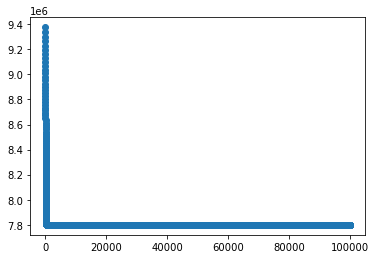

In [87]:
theta = (lr.gradient_decent()) #ploting cost with iteration, we can see that gradien decent found an global optimum...It has very high cost

In [88]:
#testing
data = df.loc[[14]]
print(data) 
lr.predict(data[['year',"km_driven"]].values)

                        name      year  selling_price  km_driven    fuel  \
14  Maruti Wagon R LXI Minor -1.444908      -0.638023  -0.347649  Petrol   

   seller_type transmission        owner  
14  Individual       Manual  First Owner  


array([[-0.57657328]])

In [89]:
#k-fold 
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [90]:
X = df[['year','km_driven']]
y = df[['selling_price']]

from sklearn.model_selection import KFold
model=LinearRegression()
kfold_validation=KFold(10)

In [91]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.12580287 0.14767351 0.15036302 0.2310867  0.23109392 0.15095536
 0.19020523 0.18083813 0.11352334 0.18488713]
0.17064291932771436


In [92]:
#very low accuracy, as selling price of a car mostly depends on its company, but here, i have not included in company as a...
#...feature because, it is a catogorical feature with so many classes, and I am yet to understand how to include catogorical...
#...values as a feature.

In [93]:
#Coefficient of determination – R2

y_mean = y.mean()
rss = lr.rss(theta)

tss = (y - y_mean) ** 2
tss_sum = np.sum((tss[['selling_price']].values))

r2 = 1 - (rss/tss_sum)
print(r2)

0.17174975569610273
